# Projecting data on PC1 and PC2 -- Latent Space

In [46]:
from sklearn.metrics import pairwise_distances
from tslearn.metrics import dtw
from scipy.spatial.distance import cdist

import pandas as pd

from utils import OUT_PATH
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
def recurrence_plot(ts, eps=0.1, tau = 1, m=1):
    N = len(ts) - (m - 1) * tau # take each time point but can extend to windows 
    Y = np.array([ts[i:i + m * tau:tau] for i in range(N)])

    #N = len(ts)
    #D = np.abs(ts.reshape(N,1) - ts.reshape(1,N)) #L1 (Manhattan) distance
    D = pairwise_distances(Y, metric='manhattan') 
    # {'cosine', 'manhattan', 'cityblock', 'chebyshev', 'rogerstanimoto', 'mahalanobis', 'jaccard', 'hamming', 'nan_euclidean', 'seuclidean', 'precomputed', 'wminkowski', 'sokalsneath', 'dice', 'euclidean', 'braycurtis', 'sqeuclidean', 'l2', 'minkowski', 'correlation', 'sokalmichener', 'haversine', 'yule', 'l1', 'matching', 'canberra', 'russellrao'}
    
    window= 1
    N = len(ts) - window
    Y = np.array([ts[i:i+window] for i in range(N)])
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            D[i, j] = dtw(Y[i], Y[j])

    return (D < eps).astype(int), D

In [49]:
data = pd.read_csv(OUT_PATH + '/grpPCA/supsubj_concat/grp_concat_Xtrans_PCA3.csv').query('freq == "high_gamma"').drop(columns = ['Unnamed: 0', 'subj', 'expl_var', 'compo', 'freq']).values
condi2 = data[:2, int(data.shape[1]/2):]
condi1 = data[:2, :int(data.shape[1]/2)]

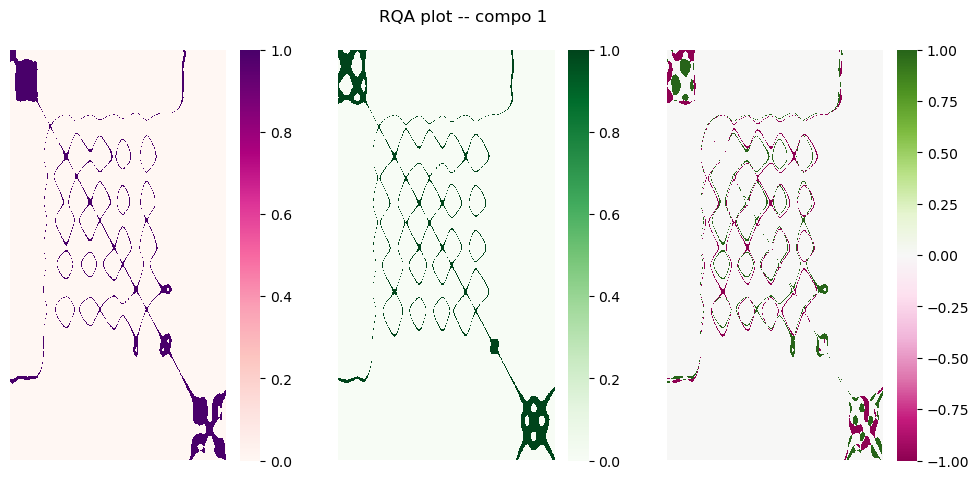

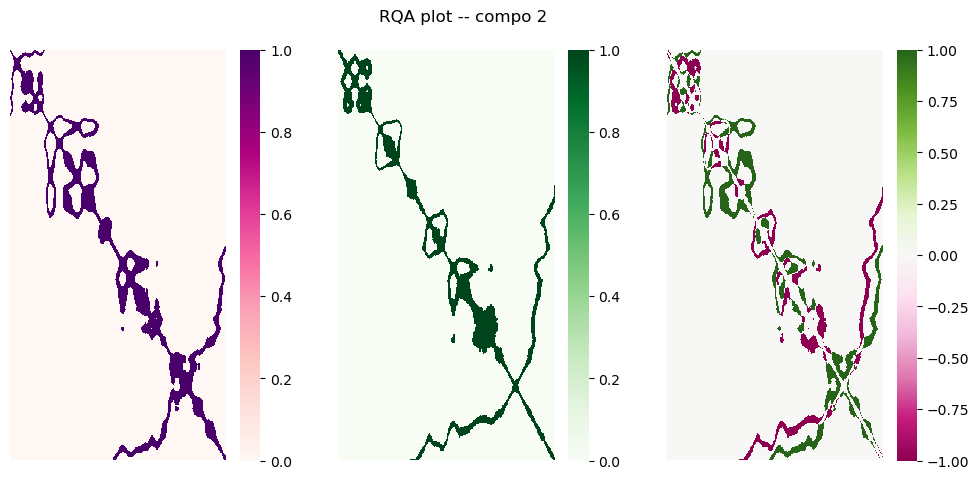

In [72]:
cmap_ev = {0 : 'RdPu', 1 : 'Greens'}
for compo in range(2)  :
    fig, axs = plt.subplots(1, 3, figsize = (10, 5))
    fig.suptitle(f'RQA plot -- compo {compo + 1}')
    fig.tight_layout()
    R_ =[]
    for ev_i, x in enumerate([condi1, condi2]) :
        R, D = recurrence_plot(x[compo, :])
        sns.heatmap(R, ax=axs[ev_i], cmap=cmap_ev[ev_i], xticklabels=False, yticklabels=False)

        R_.append(R)

    sns.heatmap(R_[0] - R_[1], ax=axs[2], cmap='PiYG', xticklabels=False, yticklabels=False)
    plt.show()

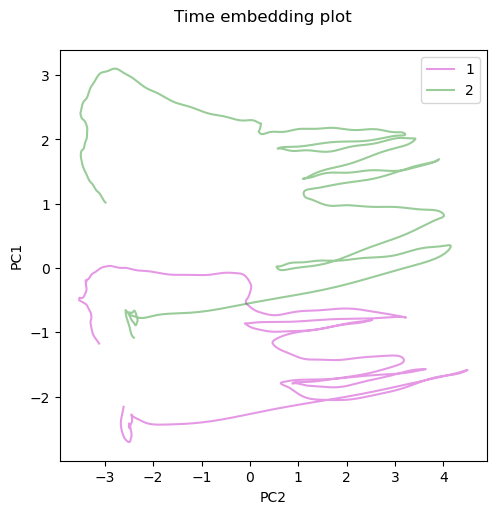

In [73]:
fig, ax = plt.subplots(figsize = (5, 5))
fig.suptitle('Time embedding plot')
fig.tight_layout()

color_ev =  {0 : 'm', 1 : 'g'}
for ev_i, x in enumerate([condi1, condi2]): 
    ax.plot(x[0, :], x[1, :] , c = color_ev[ev_i], label = ev_i + 1, alpha = 0.4)
ax.set_ylabel(f'PC1')
ax.set_xlabel(f'PC2')
ax.legend()


In [74]:
data = pd.read_csv(OUT_PATH + '/grpPCA/supsubj_mean/grp_mean_Xtrans_PCA3.csv').query('freq == "high_gamma"').drop(columns = ['Unnamed: 0', 'subj', 'expl_var', 'compo', 'freq']).values
condi2 = data[:2, int(data.shape[1]/2):]
condi1 = data[:2, :int(data.shape[1]/2)]

In [79]:
mean_tfr_per_condi_all.shape

(2, 2576, 7, 685)

In [80]:
weights.shape

(2, 2577)

In [85]:
mean_list = []
mean_tfr_per_condi  =[]

from utils import ExcludSubj, TFRmEvents
import os

subj_included = [file.replace('_TFRtrials.p', '') for file in os.listdir(OUT_PATH + '/Data') if file[-len('TFRtrials.p'):] == 'TFRtrials.p']
subj_included = ExcludSubj(subj_included)
interesting_ev = [0, 1]

for subj in subj_included : 
    TFRm = TFRmEvents(subj)
    mean_list.append(np.mean(TFRm[interesting_ev, :, :,:], axis = 0))
    mean_tfr_per_condi.append(TFRm[interesting_ev, :, :,:])

mean_all = np.concatenate(mean_list, axis = 0)
mean_tfr_per_condi_all = np.concatenate(mean_tfr_per_condi, axis = 1)

df_Componants_mean = pd.read_csv(OUT_PATH + '/grpPCA/supsubj_mean/grp_mean_compo_PCA3.csv').drop(columns='Unnamed: 0')

nb_compo=2

band = 'high_gamma'
i_b = 6

weights = df_Componants_mean.query('freq == @band').drop(columns = ['compo', 'freq']).values[:2, :]
data1 = weights @ mean_tfr_per_condi_all[0,:, i_b, :]
data2 = weights @ mean_tfr_per_condi_all[1,:, i_b, :]
data = np.concat([data1, data2], axis = 1)




In [86]:
condi2 = data[:2, int(data.shape[1]/2):]
condi1 = data[:2, :int(data.shape[1]/2)]

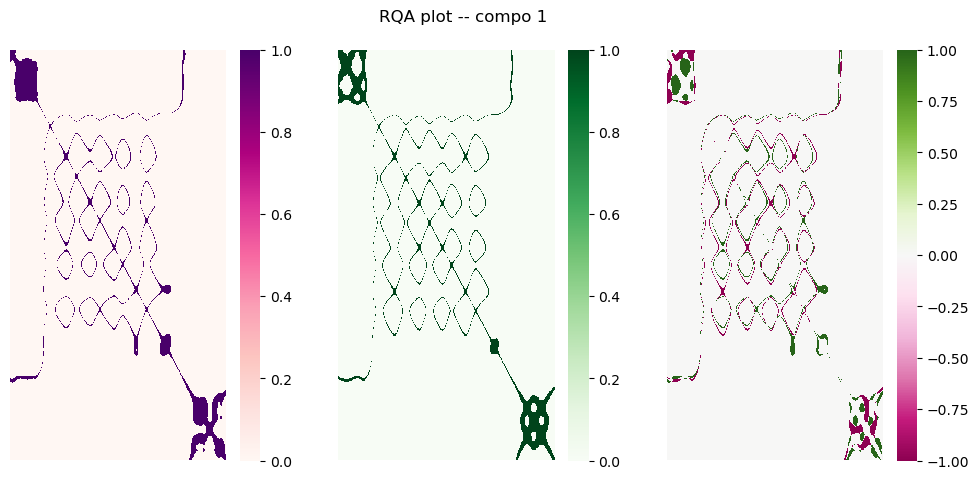

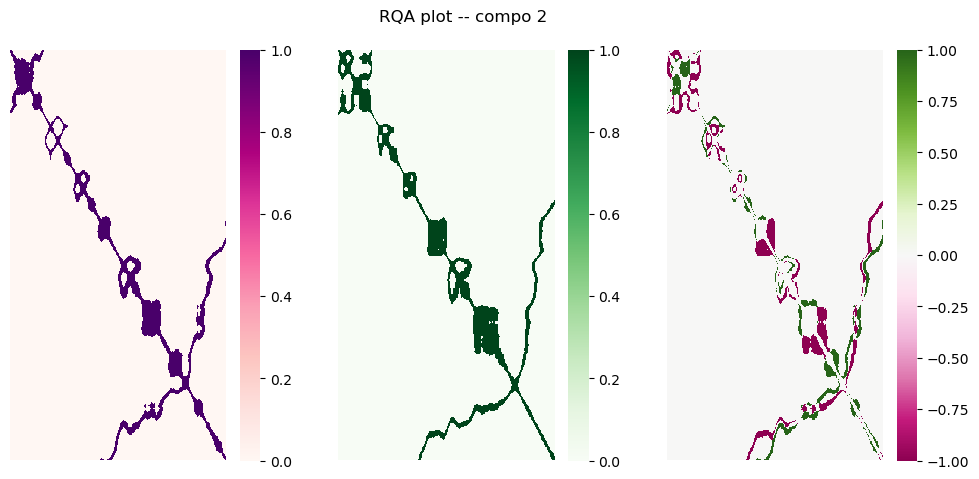

In [87]:
cmap_ev = {0 : 'RdPu', 1 : 'Greens'}
for compo in range(2)  :
    fig, axs = plt.subplots(1, 3, figsize = (10, 5))
    fig.suptitle(f'RQA plot -- compo {compo + 1}')
    fig.tight_layout()
    R_ =[]
    for ev_i, x in enumerate([condi1, condi2]) :
        R, D = recurrence_plot(x[compo, :])
        sns.heatmap(R, ax=axs[ev_i], cmap=cmap_ev[ev_i], xticklabels=False, yticklabels=False)

        R_.append(R)

    sns.heatmap(R_[0] - R_[1], ax=axs[2], cmap='PiYG', xticklabels=False, yticklabels=False)
    plt.show()

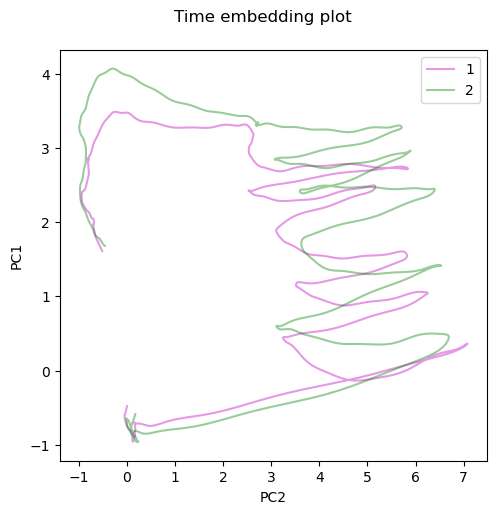

In [88]:
fig, ax = plt.subplots(figsize = (5, 5))
fig.suptitle('Time embedding plot')
fig.tight_layout()

color_ev =  {0 : 'm', 1 : 'g'}
for ev_i, x in enumerate([condi1, condi2]): 
    ax.plot(x[0, :], x[1, :] , c = color_ev[ev_i], label = ev_i + 1, alpha = 0.4)
ax.set_ylabel(f'PC1')
ax.set_xlabel(f'PC2')
ax.legend()